In [1]:
import pandas as pd
df = pd.read_csv("D:\\Datasets\\thyroid+disease\\new-thyroid.data",header=None)
df.head()

,0,1,2,3,4,5
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


In [2]:
df.shape

(215, 6)

In [3]:
df.columns = ["Class", "T3-resin", "Thyroxine", "Triiodothyronine", "TSH", "Max-T3"]

In [4]:
df.head()

,Class,T3-resin,Thyroxine,Triiodothyronine,TSH,Max-T3
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             215 non-null    int64  
 1   T3-resin          215 non-null    int64  
 2   Thyroxine         215 non-null    float64
 3   Triiodothyronine  215 non-null    float64
 4   TSH               215 non-null    float64
 5   Max-T3            215 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.2 KB


In [6]:
df.isna().sum().sum()  # No missing values or NaN to handle

0

In [7]:
# Count distribution of each class
df['Class'].value_counts()

Class
1    150
2     35
3     30
Name: count, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

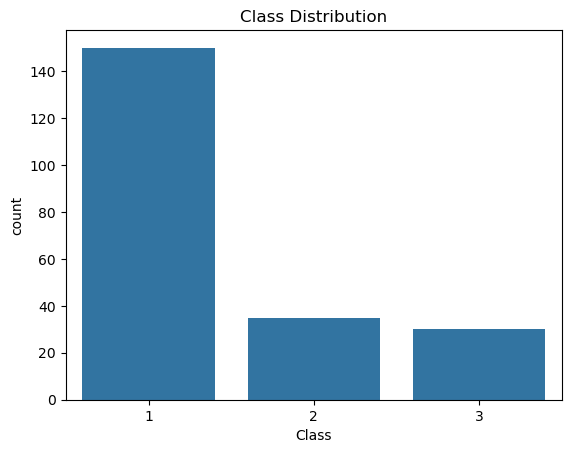

In [9]:
# Visualizing class distribution
sns.countplot(x=df["Class"])
plt.title("Class Distribution")
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE

New Class Distribution (After SMOTE):
 Class
1    150
2    150
3    150
Name: count, dtype: int64


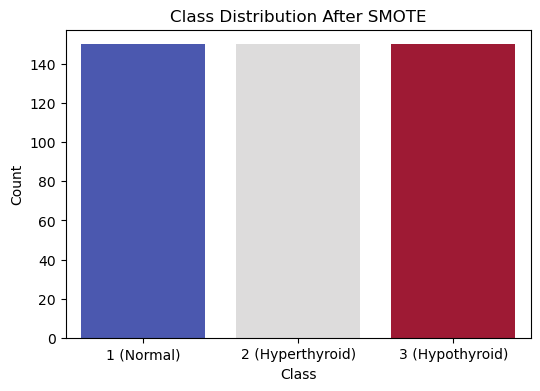

In [11]:
# Splitting features (X) and target (y)
X = df.drop(columns=["Class"])
y = df["Class"]

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["Class"] = y_resampled

# Check new class distribution
class_counts_balanced = df_balanced["Class"].value_counts()
print("New Class Distribution (After SMOTE):\n", class_counts_balanced)

# Plot new class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts_balanced.index, y=class_counts_balanced.values, hue=class_counts_balanced.index, palette="coolwarm", legend=False)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.xticks(ticks=[0, 1, 2], labels=["1 (Normal)", "2 (Hyperthyroid)", "3 (Hypothyroid)"])
plt.show()

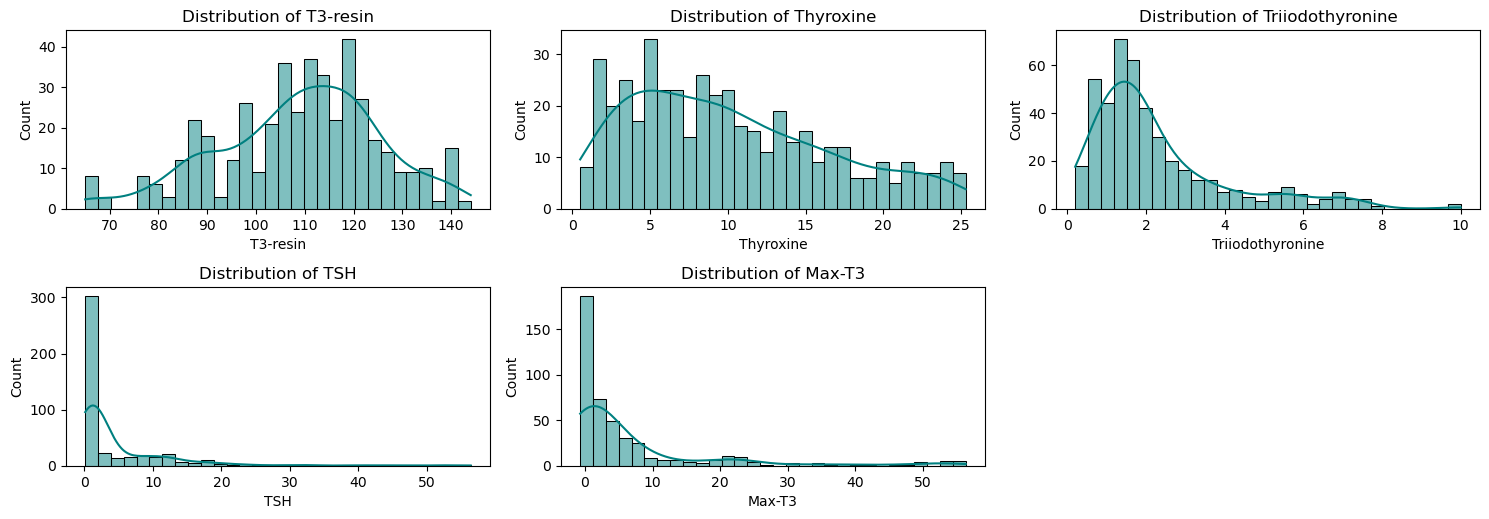

In [12]:
# Select numerical features (excluding the target column)
numeric_features = df_balanced.drop(columns=["Class"])

# Plot feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features.columns, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size based on the number of features
    sns.histplot(numeric_features[col], kde=True, bins=30, color="teal")  # Histogram with KDE
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Thyroxine           0.5
Triiodothyronine    0.2
TSH                 0.1
Max-T3             -0.7
dtype: float64


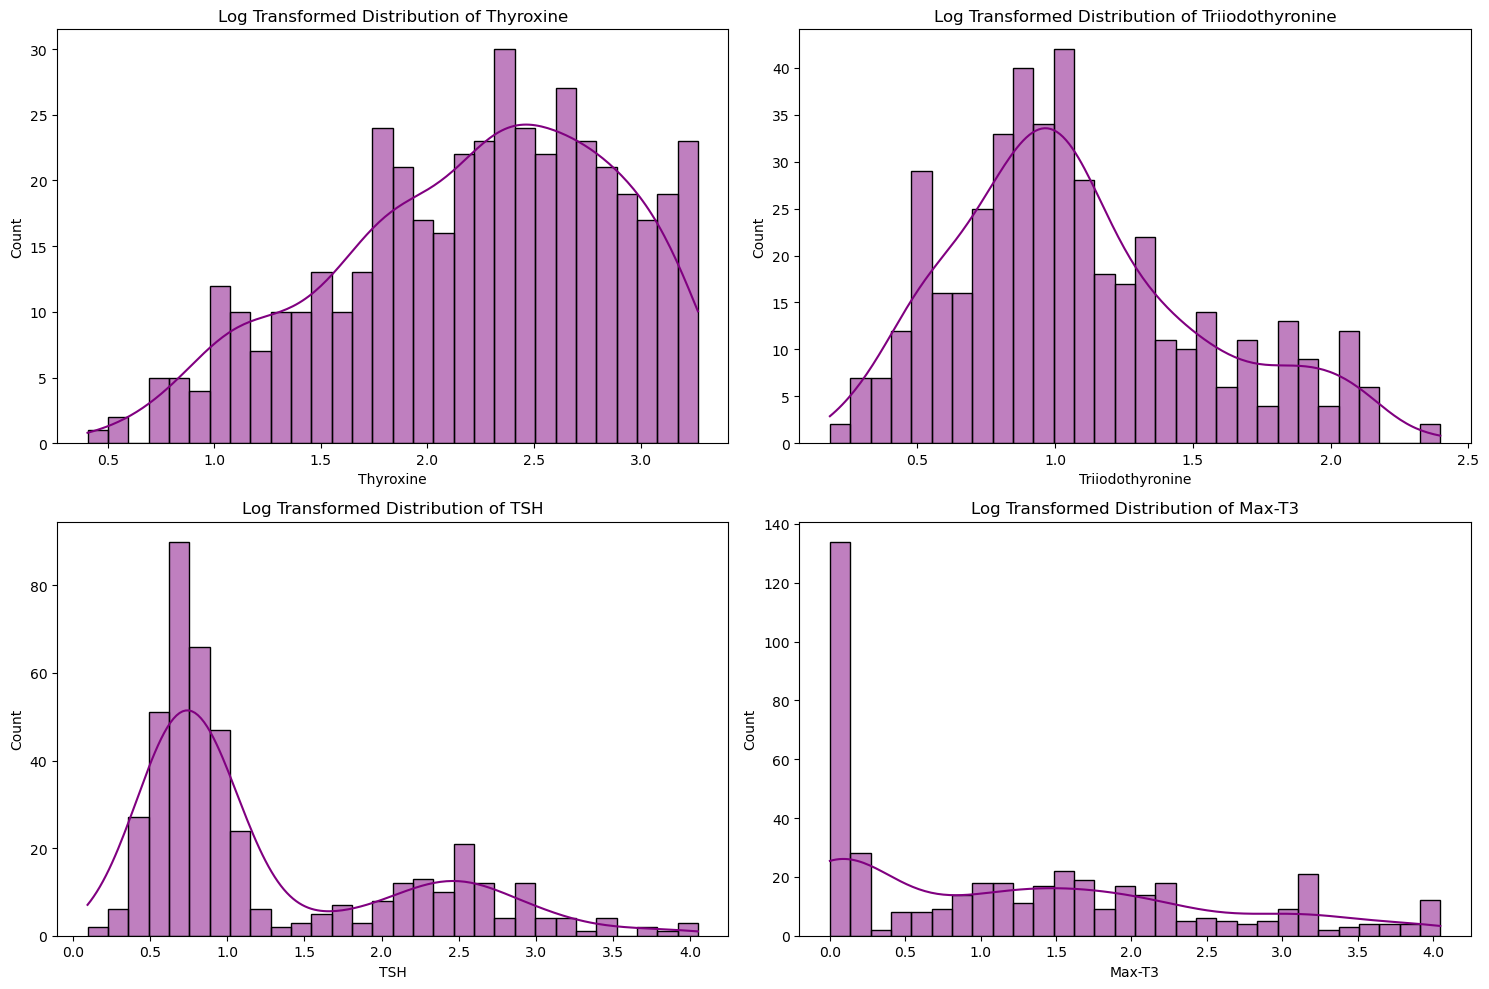

In [13]:
import numpy as np

# List of skewed features to transform
skewed_features = ["Thyroxine", "Triiodothyronine", "TSH", "Max-T3"]

# Check for negative values
print(df_balanced[skewed_features].min())

# Replace negative values with 0 (or shift the values if needed)
df_balanced[skewed_features] = df_balanced[skewed_features].apply(lambda x: np.where(x < 0, 0, x))

# Apply log transformation safely
df_balanced[skewed_features] = df_balanced[skewed_features].apply(lambda x: np.log1p(x))

# Plot the transformed distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(skewed_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_balanced[col], kde=True, bins=30, color="purple")
    plt.title(f"Log Transformed Distribution of {col}")
plt.tight_layout()
plt.show()

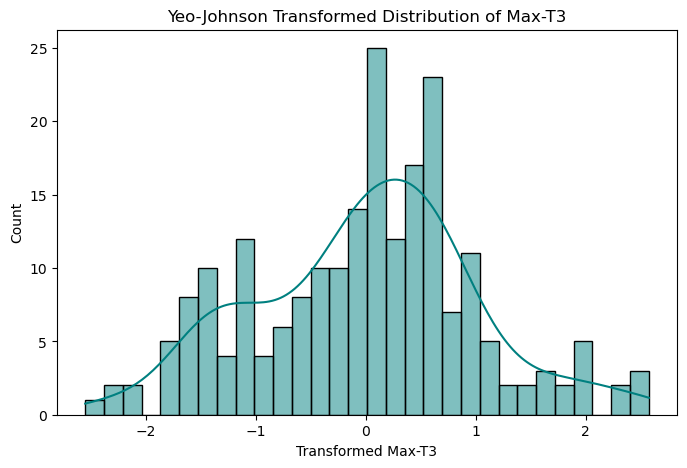

Skewness after Yeo-Johnson transformation: 0.0077


In [14]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')  
df['Max-T3_YJ'] = pt.fit_transform(df[['Max-T3']])

# Plot the transformed distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Max-T3_YJ'], bins=30, kde=True, color='teal')
plt.title("Yeo-Johnson Transformed Distribution of Max-T3")
plt.xlabel("Transformed Max-T3")
plt.ylabel("Count")
plt.show()

# Check skewness
skew_value = df['Max-T3_YJ'].skew()
print(f"Skewness after Yeo-Johnson transformation: {skew_value:.4f}")

In [15]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for standardization
features_to_scale = ['Thyroxine', 'Triiodothyronine', 'TSH', 'Max-T3']  

# Creating a StandardScaler instance
scaler = StandardScaler()

# Applying standardization
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print(df_scaled.head())  # View transformed data

   Class  T3-resin  Thyroxine  Triiodothyronine       TSH    Max-T3  Max-T3_YJ
0      1       107   0.063022          0.105754 -0.324389 -0.186180   0.283937
1      1       113   0.020346          0.741266 -0.144173  0.211250   0.902372
2      1       127   0.660493          0.246979 -0.242472 -0.446993  -0.658358
3      1       109  -0.961213         -0.317920 -0.242472 -0.335216  -0.140046
4      1       105  -0.534448         -0.388533 -0.226089 -0.533931  -1.386737


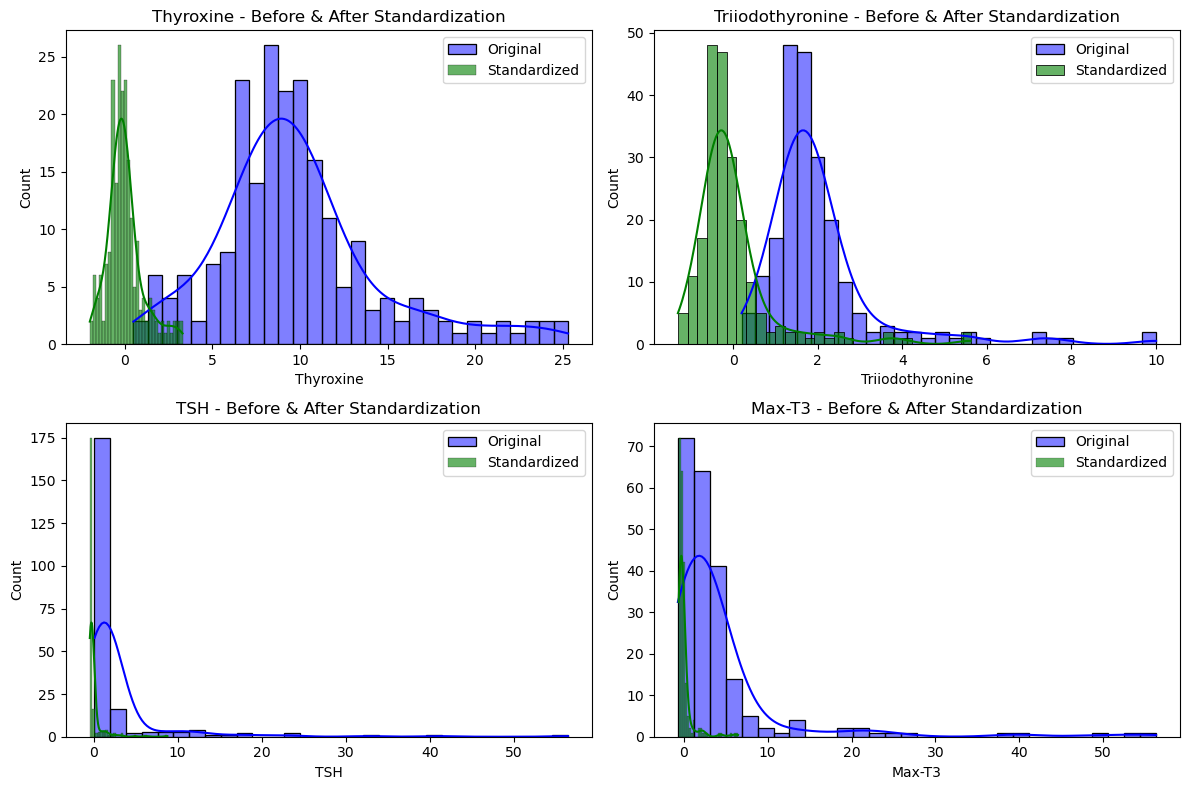

In [16]:
# Plot original vs standardized distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for idx, feature in enumerate(features_to_scale):
    row, col = divmod(idx, 2)
    
    # Original data
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row, col], color="blue", label="Original")
    
    # Standardized data
    sns.histplot(df_scaled[feature], bins=30, kde=True, ax=axes[row, col], color="green", label="Standardized", alpha=0.6)
    
    axes[row, col].set_title(f"{feature} - Before & After Standardization")
    axes[row, col].legend()

plt.tight_layout()
plt.show()

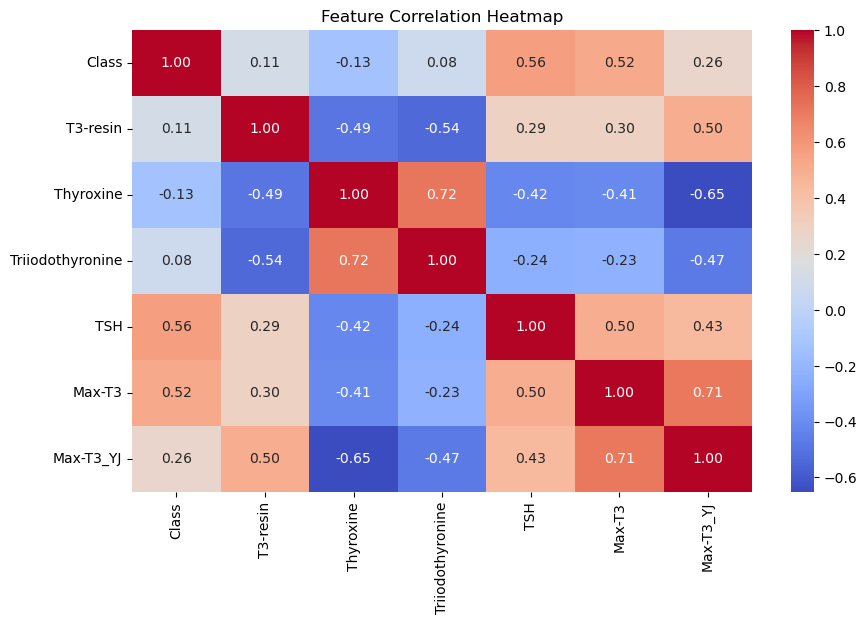

In [17]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

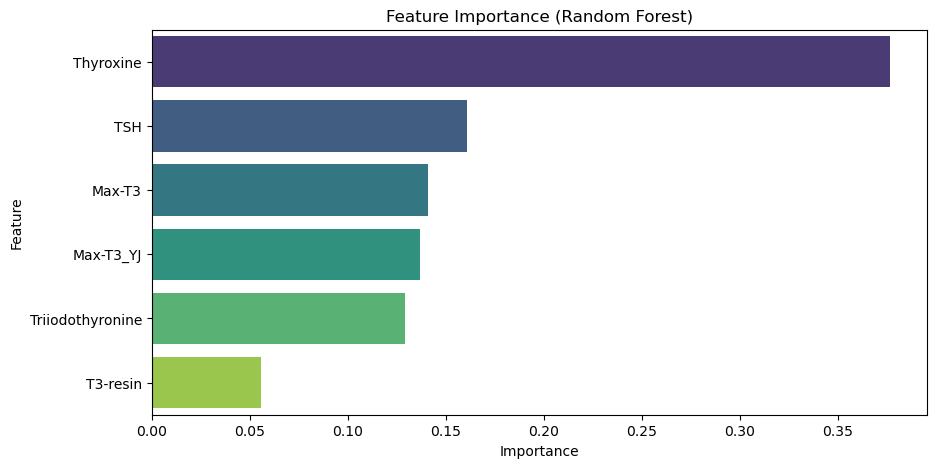

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = df.drop(columns=["Class"])  # Replace "Class" with your actual target column
y = df["Class"]

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Create a DataFrame to display importance
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.show()

✅ X_selected was successfully assigned.

🔹 Model Accuracy: 1.00

              precision  recall  f1-score  support
1                   1.0     1.0       1.0     28.0
2                   1.0     1.0       1.0      8.0
3                   1.0     1.0       1.0      7.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     43.0
weighted avg        1.0     1.0       1.0     43.0


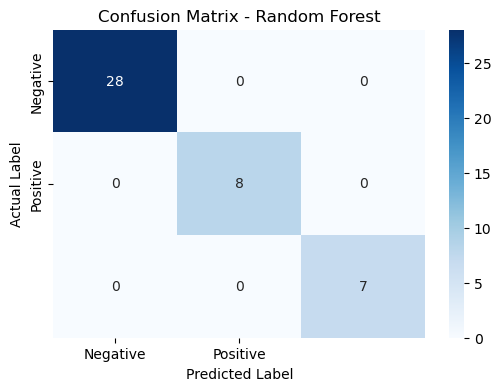

In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure X_selected exists
if 'X_selected' not in locals():
    try:
        important_features = ['Thyroxine', 'TSH', 'Max-T3', 'Max-T3_YJ', 'Triiodothyronine']
        X_selected = X[important_features]  # Adjust feature names if different
        print("✅ X_selected was successfully assigned.")
    except NameError:
        raise ValueError("❌ X_selected is not defined. Check feature selection step!")

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Model Accuracy: {accuracy:.2f}\n")

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix with Labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [20]:
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_selected, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-Validation Accuracy: 0.95 ± 0.04


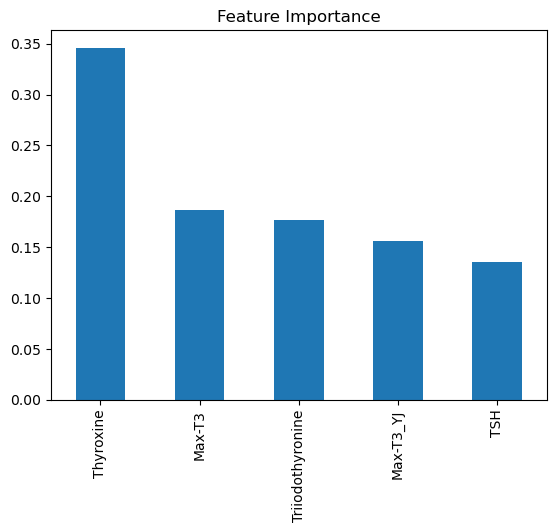

In [22]:
feature_importances = pd.Series(model.feature_importances_, index=X_selected.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Updated Accuracy after Hyperparameter Tuning: 0.98
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43



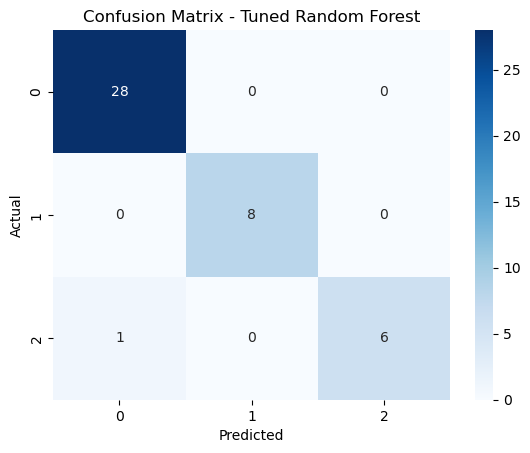

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'bootstrap': [True, False]  # Use bootstrap samples
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random samples
    cv=5,  # 5-Fold Cross Validation
    verbose=2,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters from tuning
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the tuned model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Accuracy after Hyperparameter Tuning: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report (includes Precision, Recall, and F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00         8
           3       1.00      0.86      0.92         7

    accuracy                           0.98        43
   macro avg       0.99      0.95      0.97        43
weighted avg       0.98      0.98      0.98        43



In [25]:
import pickle

# Save the trained model to a pickle file
with open('thyroid_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved successfully!")

Model saved successfully!


In [26]:
print(X_train.columns)

Index(['Thyroxine', 'TSH', 'Max-T3', 'Max-T3_YJ', 'Triiodothyronine'], dtype='object')


NameError: name 'X_train' is not defined